# Libraries

In [840]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud 

# Gráficos GPT

In [841]:
# Read data
df_gpt_results = pd.read_csv("./results-gpt/dogecoin_sentiment_gpt_data.csv")
df_gpt_results['date'] = pd.to_datetime(df_gpt_results['date']).dt.date

df_dogecoin = pd.read_csv("./data/dogecoin.csv")
df_dogecoin['date'] = pd.to_datetime(df_dogecoin['date']).dt.date

In [842]:
#Check data
df_gpt_results

date                                        clean_tweet sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...  POSITIVE
1    2013-05-25  am not suggesting shutting down co2 production...   NEUTRAL
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...   NEUTRAL
..          ...                                                ...       ...
241  2021-02-19  somehow  a hash text file using ancient crypto...  POSITIVE
242  2021-02-19  to be clear  i am  not  an investor  i am an e...  POSITIVE
243  2021-02-19  tesla s action is not directly reflective of m...  NEGATIVE
244  2021-02-15  an acceptable percentage  doge is much more co...  POSITIVE
245  2021-02-15  if major dogecoin holders sell most of their c...   NEUTRAL

[246 rows x 3 columns]

In [843]:
#Check data
df_dogecoin

date  dogecoin_price  stonks
0     2013-12-16        0.000422       0
1     2013-12-18        0.000158      -1
2     2013-12-19        0.000157      -1
3     2013-12-20        0.000422       1
4     2013-12-21        0.000671       1
...          ...             ...     ...
3432  2023-05-13        0.066128      -1
3433  2023-05-14        0.066482       1
3434  2023-05-15        0.065736      -1
3435  2023-05-16        0.066441       1
3436  2023-05-17        0.066380      -1

[3437 rows x 3 columns]

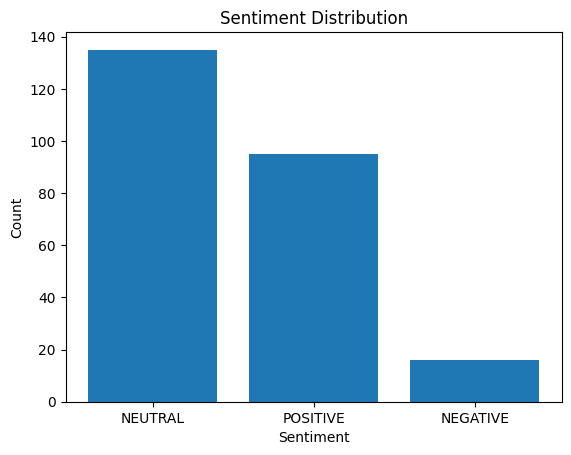

In [844]:
# Plot sentiment distribution (bar)
sentiment_counts = df_gpt_results['sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

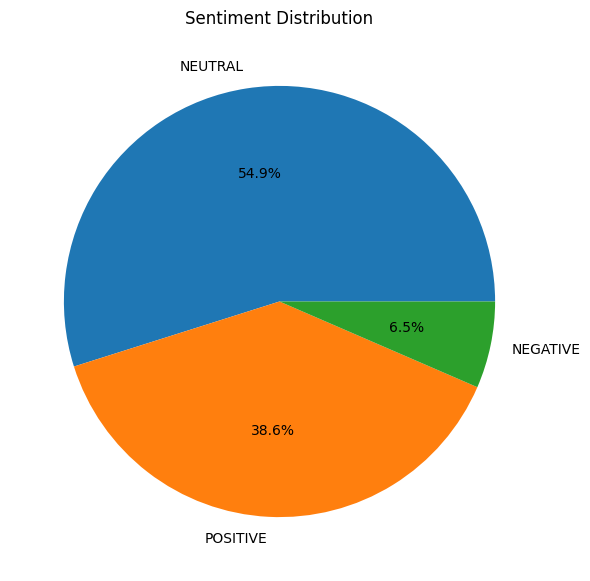

In [845]:
# Plot sentiment distribution (pie)
sentiment_counts = df_gpt_results['sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

C:\Users\drago\AppData\Local\Temp\ipykernel_11832\3854301120.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


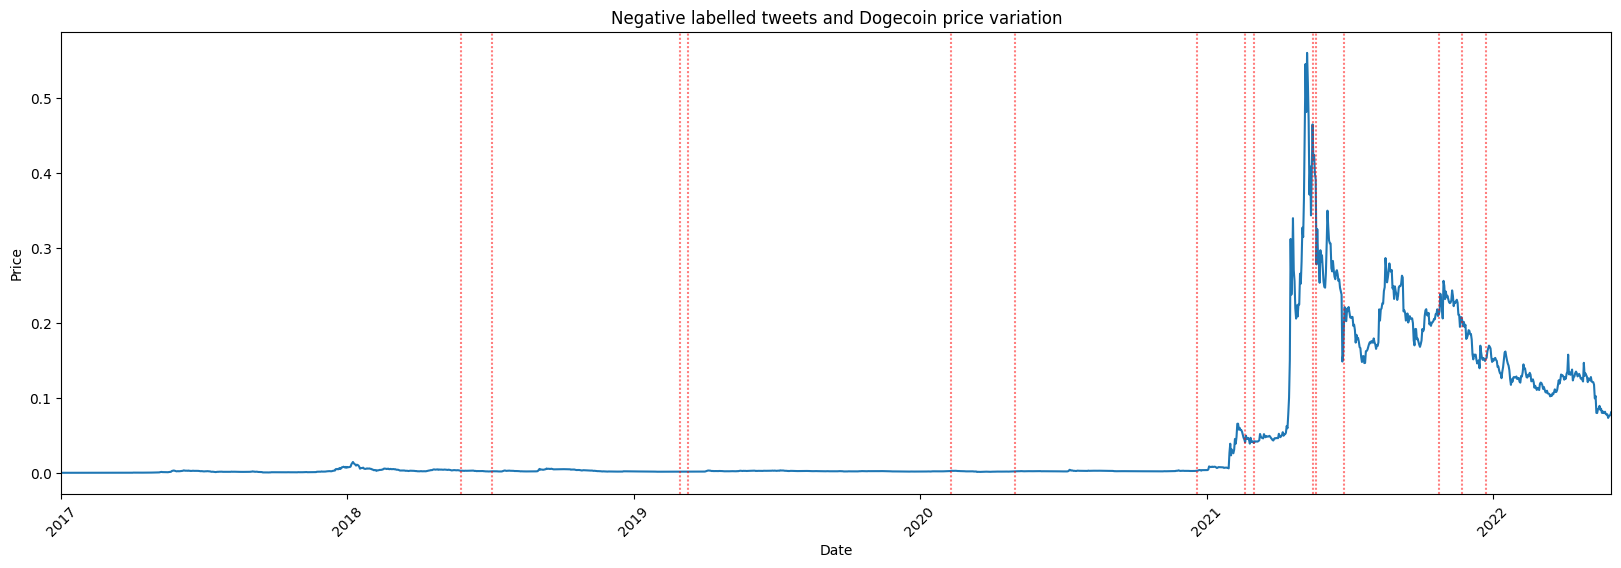

In [846]:
# Historic Price of Dogecoin over time and Negative tweets

a = df_gpt_results[df_gpt_results['sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01") 
end_date = pd.to_datetime("2022-06-01")
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [847]:
#Tweets that can influence:
print( str(a.iloc[12]['date']) +  ' : "' + a.iloc[12]['clean_tweet'] + '"')
print( str(a.iloc[13]['date']) +  ' : "' + a.iloc[13]['clean_tweet'] + '"')
print( str(a.iloc[14]['date']) +  ' : "' + a.iloc[14]['clean_tweet'] + '"')

2021-06-25 : " that s not funny     bitcoin maxis"
2021-10-24 : "plus crypto scams haha"
2021-11-23 : "hey   what s going on with your doge customers  sounds shady "


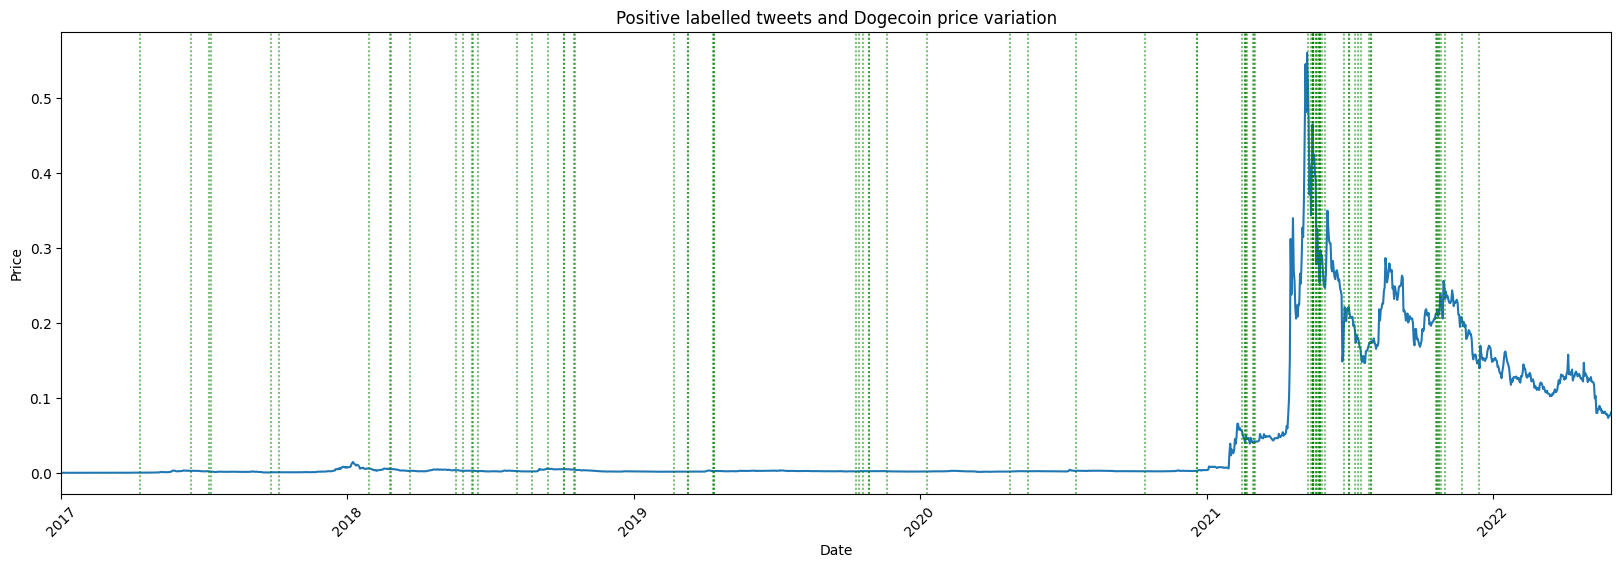

In [848]:
# Historic Price of Dogecoin over time and Positive tweets

a = df_gpt_results[df_gpt_results['sentiment'] == 'POSITIVE']

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each positive tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2022-06-01")
plt.xlim(start_date, end_date)

# Display the graph
plt.show()

In [849]:
# Map sentiment to numeric values
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_gpt_results['sentiment_encoded'] = df_gpt_results['sentiment'].map(sentiment_mapping)

In [850]:
# Group by date and sum the sentiment values
grouped_data = df_gpt_results.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              0
1    2013-05-03              2
2    2013-05-25              0
3    2013-06-28              1
4    2014-01-23              0
..          ...            ...
173  2021-11-23              0
174  2021-11-26              0
175  2021-11-27              0
176  2021-12-14              1
177  2021-12-23             -1

[178 rows x 2 columns]

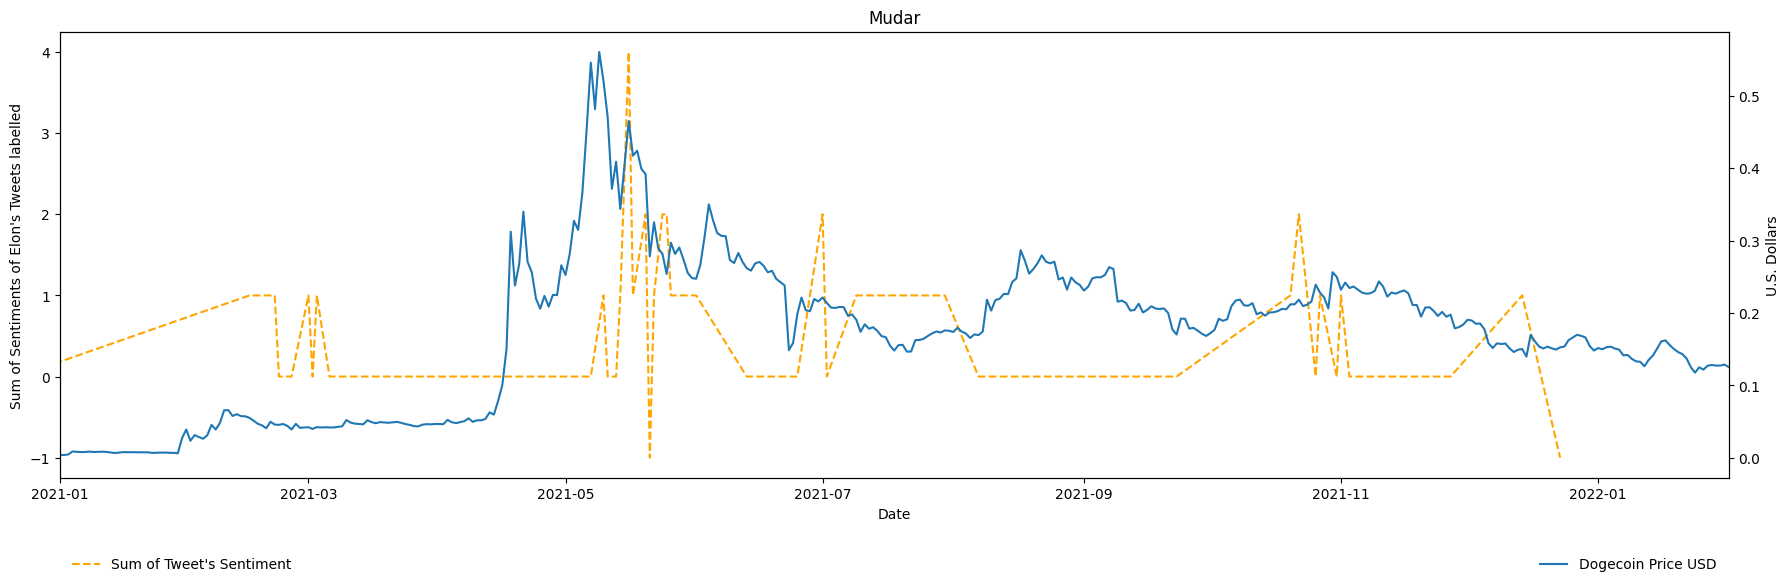

In [851]:
# Plot the sentiment sum over time

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  
end_date = pd.to_datetime("2022-02-01") 
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## WordCLouds

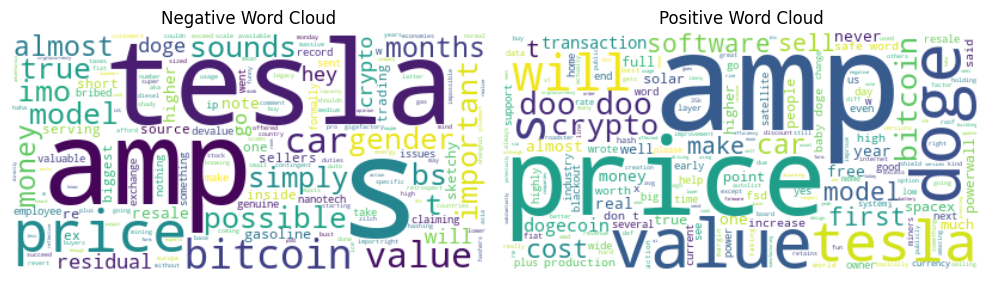

In [852]:
data = pd.read_csv('./results-gpt/dogecoin_sentiment_gpt_data.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# BERT - Modelo de Laurens88

In [853]:
#Read the data
df_laurens88 = pd.read_csv("./results-BERT/label_bert_laurens88_tweets.csv")
df_laurens88['date'] = pd.to_datetime(df_laurens88['date']).dt.date

In [854]:
#Check the data
df_laurens88

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...  NEGATIVE
1    2013-05-25  am not suggesting shutting down co2 production...   NEUTRAL
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin   NEUTRAL
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

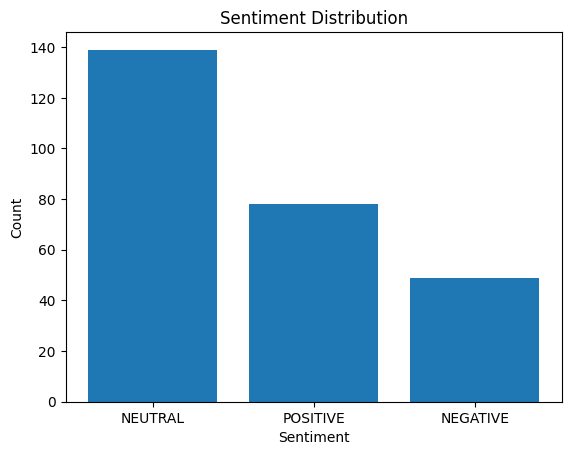

In [855]:
# Plot the sentiment distribution (bar)
sentiment_counts = df_laurens88['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

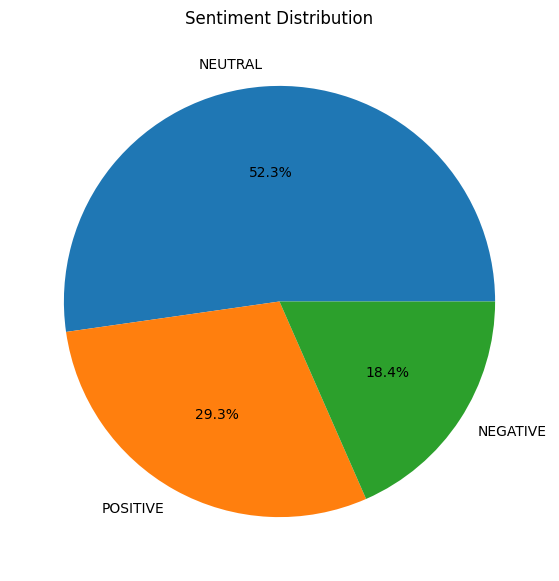

In [856]:
# Plot the sentiment distribution (pie)
sentiment_counts = df_laurens88['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

C:\Users\drago\AppData\Local\Temp\ipykernel_11832\2457630571.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


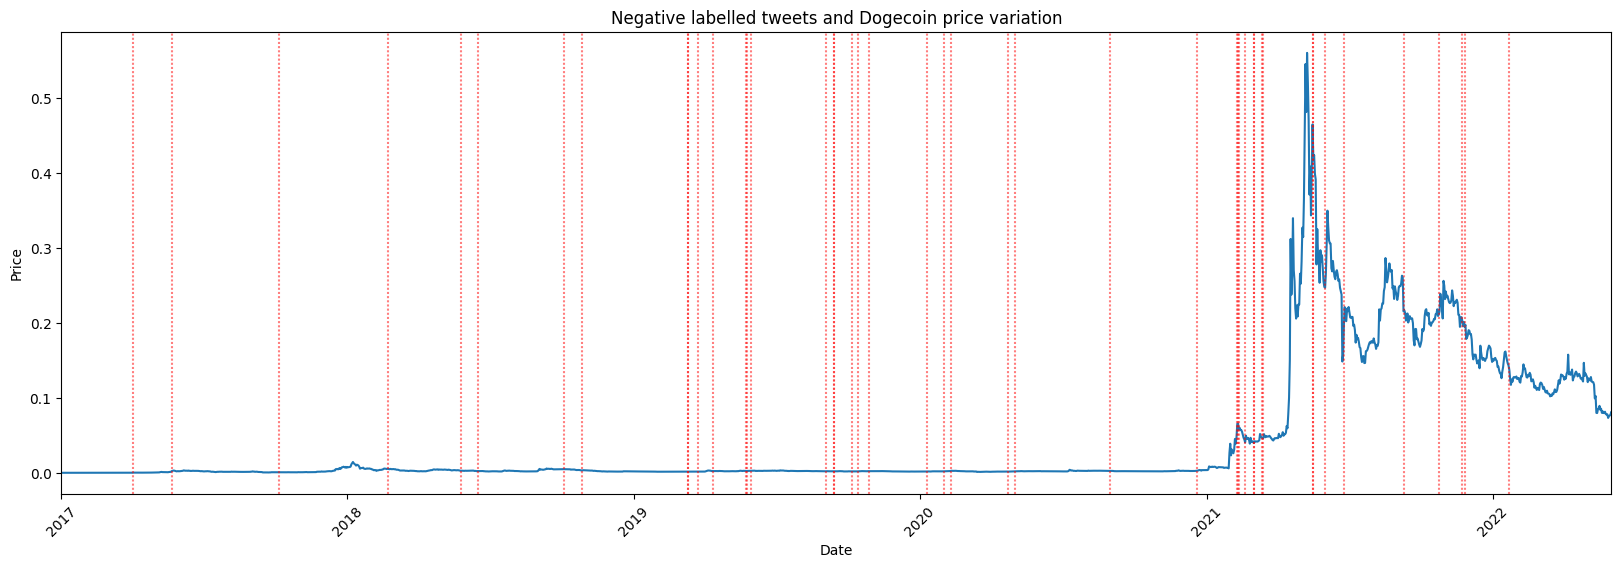

In [857]:
# Plot the Dogecoin price over time and the negative tweets
a = df_laurens88[df_laurens88['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


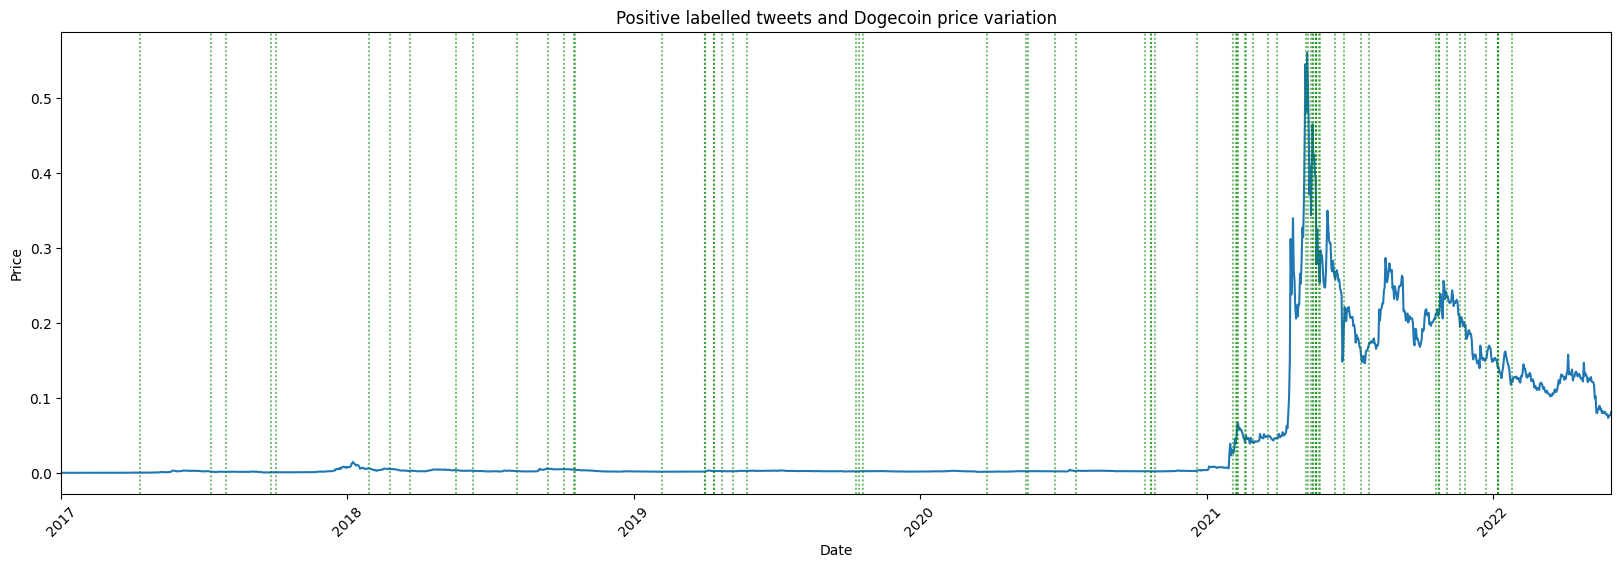

In [858]:
# Plot the Dogecoin price over time and the positive tweets

a = df_laurens88[df_laurens88['Sentiment'] == 'POSITIVE']

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [859]:
# Map sentiment to numeric values
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_laurens88['sentiment_encoded'] = df_laurens88['Sentiment'].map(sentiment_mapping)

In [860]:
# Group the data by date and sum the sentiment values
grouped_data = df_laurens88.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              0
1    2013-05-03              3
2    2013-05-25              0
3    2013-06-28             -1
4    2014-01-23             -1
..          ...            ...
186  2021-12-23              1
187  2022-01-08              3
188  2022-01-14              0
189  2022-01-21             -1
190  2022-01-25              1

[191 rows x 2 columns]

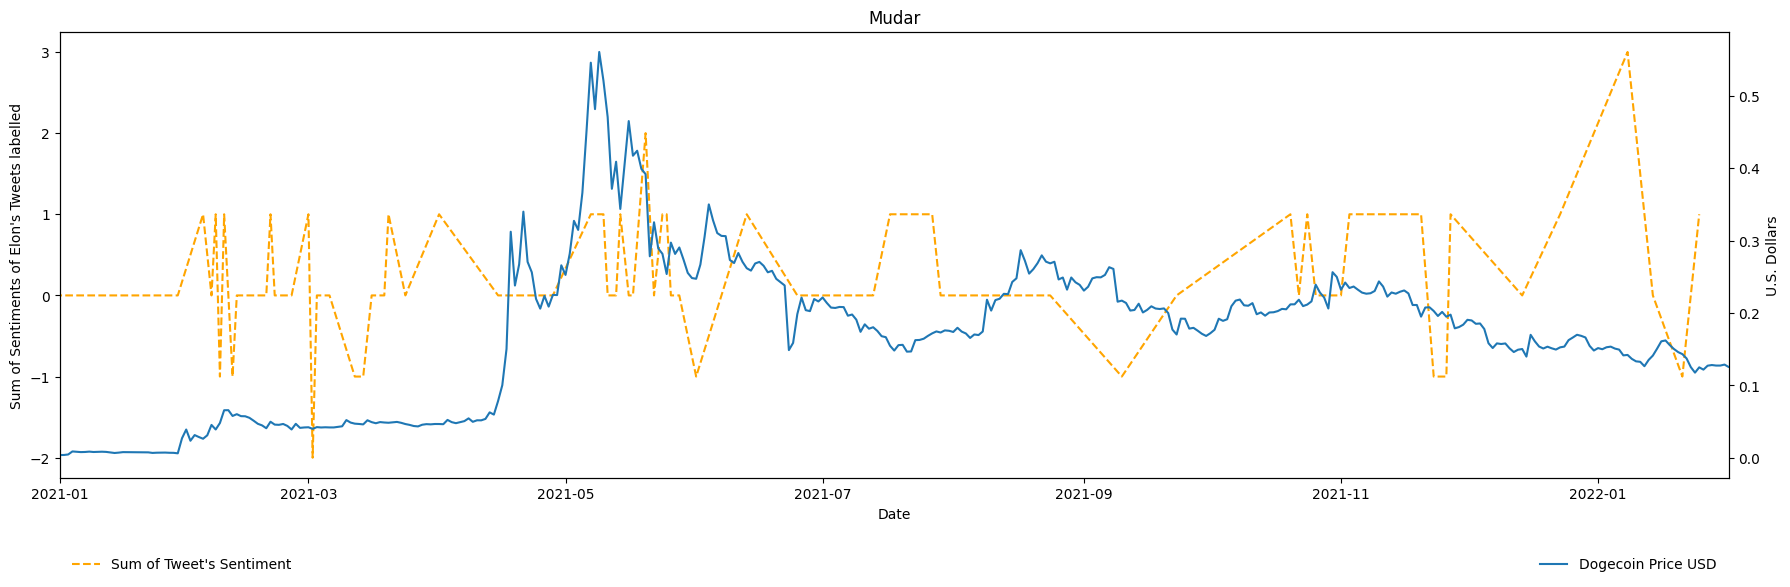

In [861]:
# Plot the sum of sentiments over time

fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  
end_date = pd.to_datetime("2022-02-01")
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## WordClouds

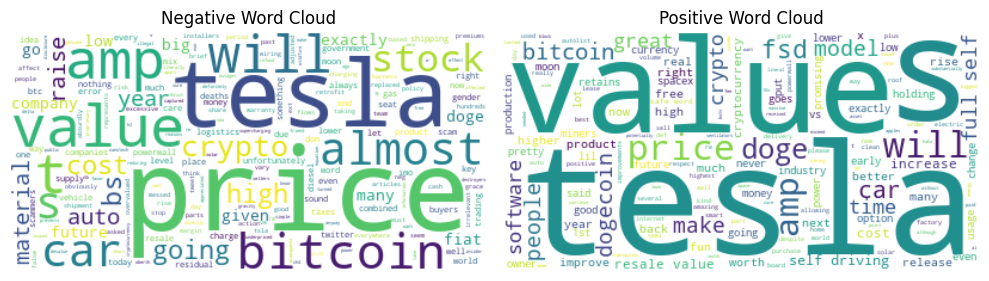

In [862]:
data = pd.read_csv('./results-BERT/label_bert_laurens88_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# BERT - Modelo de Svalabs

In [863]:
#Read the data
df_svalabs = pd.read_csv("./results-BERT/label_bert_svalabs_tweets.csv")
df_svalabs['date'] = pd.to_datetime(df_svalabs['date']).dt.date

In [864]:
#Check the data
df_svalabs

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...   NEUTRAL
1    2013-05-25  am not suggesting shutting down co2 production...  POSITIVE
2    2013-05-03  guaranteeing the world s best resale value in ...   NEUTRAL
3    2013-05-03  yes  this does put an indirect floor on resale...   NEUTRAL
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin   NEUTRAL
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

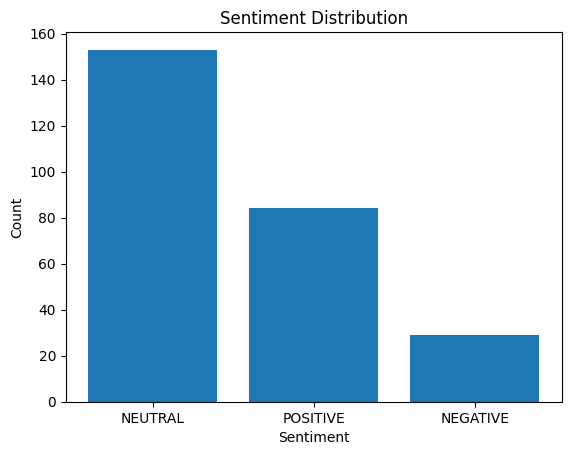

In [865]:
# Plot the distribution of sentiments (bar)
sentiment_counts = df_svalabs['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

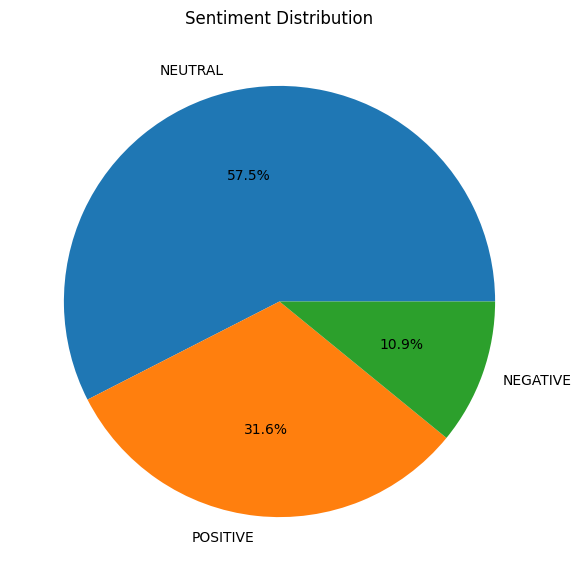

In [866]:
# Plot the distribution of sentiments (pie)
sentiment_counts = df_svalabs['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

C:\Users\drago\AppData\Local\Temp\ipykernel_11832\4280724292.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


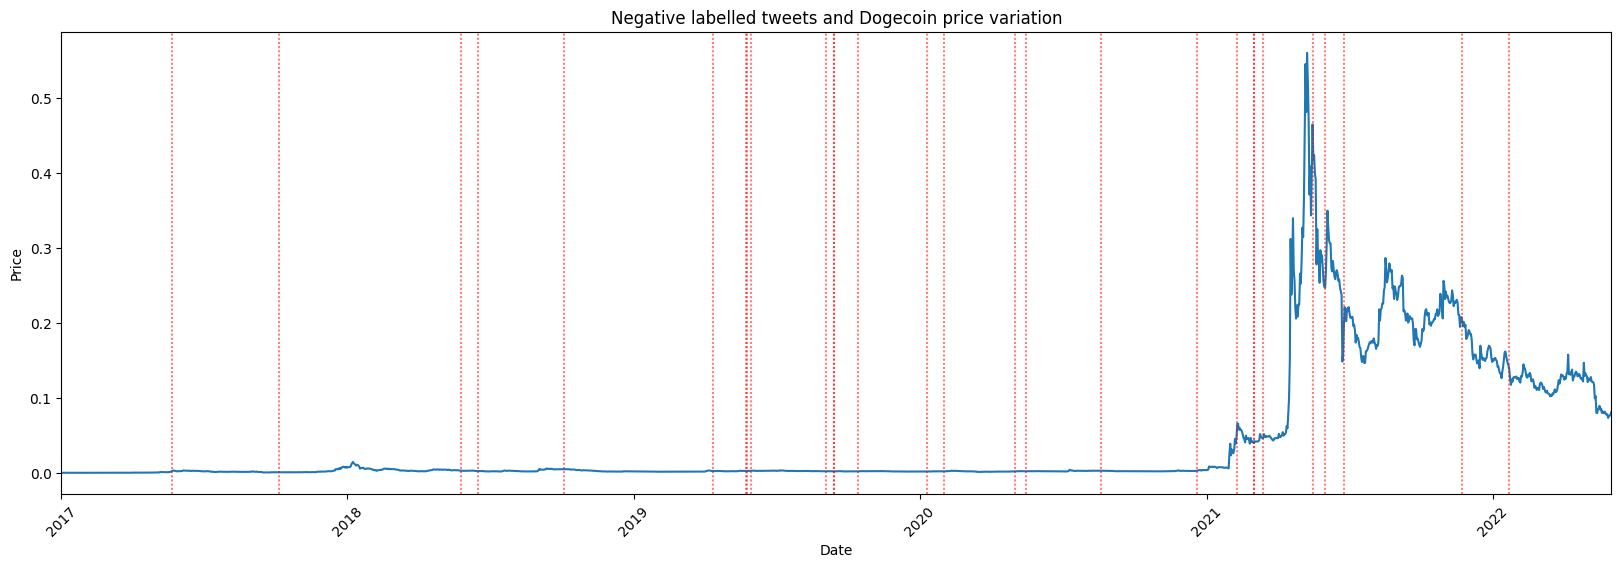

In [867]:
#Plot the distribution of Negative tweets over time

a = df_svalabs[df_svalabs['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


C:\Users\drago\AppData\Local\Temp\ipykernel_11832\1470171848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


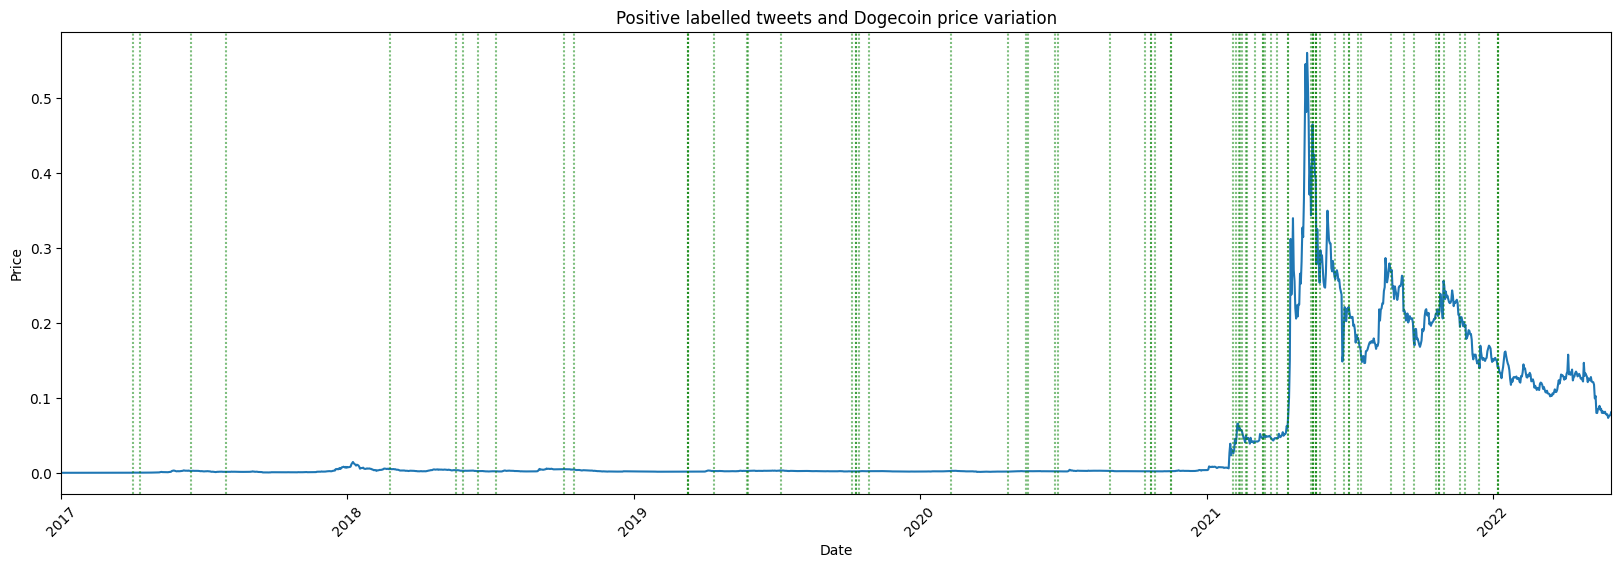

In [868]:
#Plot the distribution of Positive tweets over time
a = df_svalabs[df_svalabs['Sentiment'] == 'POSITIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-06-01")   # Replace with your desired end date
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [869]:
#Map the sentiment to a numerical value
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_svalabs['sentiment_encoded'] = df_svalabs['Sentiment'].map(sentiment_mapping)

In [870]:
#Group the data by date and sum the sentiment values
grouped_data = df_svalabs.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              0
1    2013-05-03              1
2    2013-05-25              1
3    2013-06-28              0
4    2014-01-23              0
..          ...            ...
186  2021-12-23              0
187  2022-01-08              3
188  2022-01-14              0
189  2022-01-21             -1
190  2022-01-25              0

[191 rows x 2 columns]

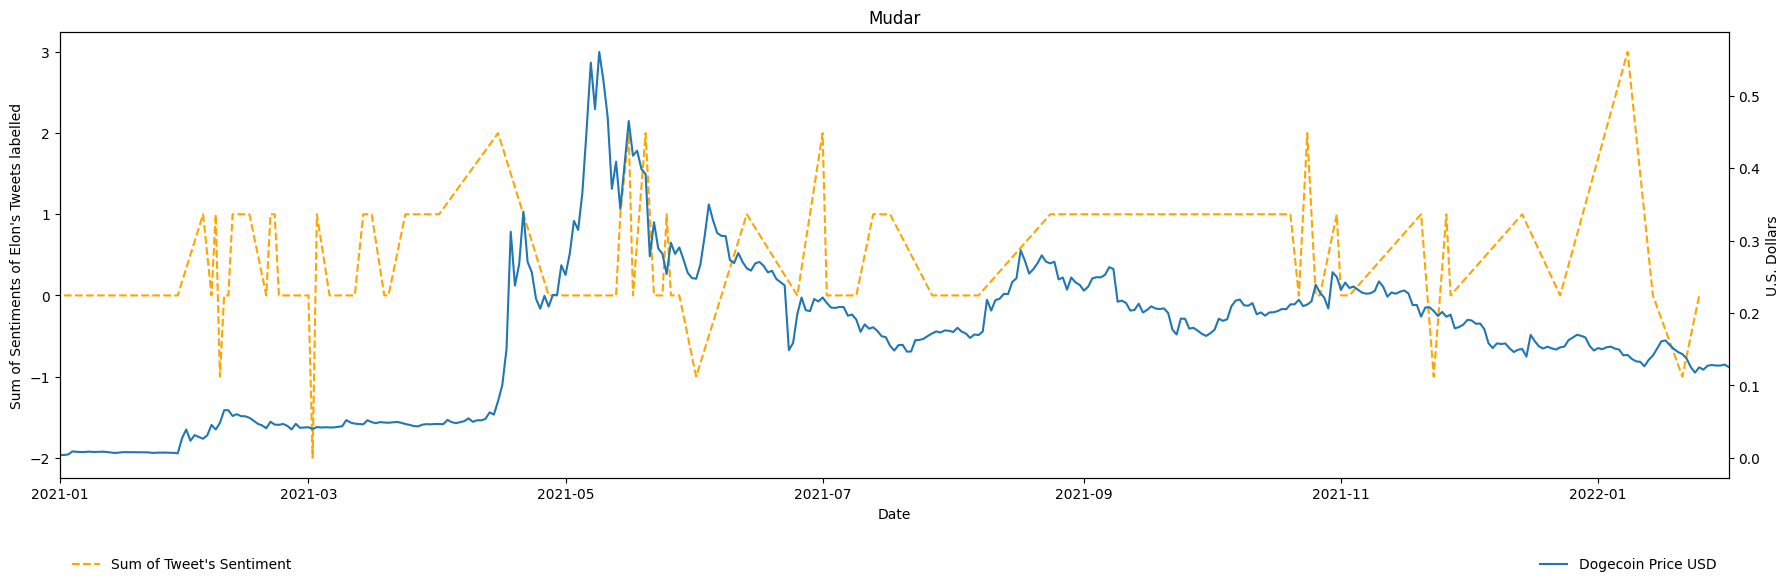

In [871]:
# Plot the line graph
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  # Replace with your desired start date
end_date = pd.to_datetime("2022-02-01")    # Replace with your desired end date
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## WordCloud

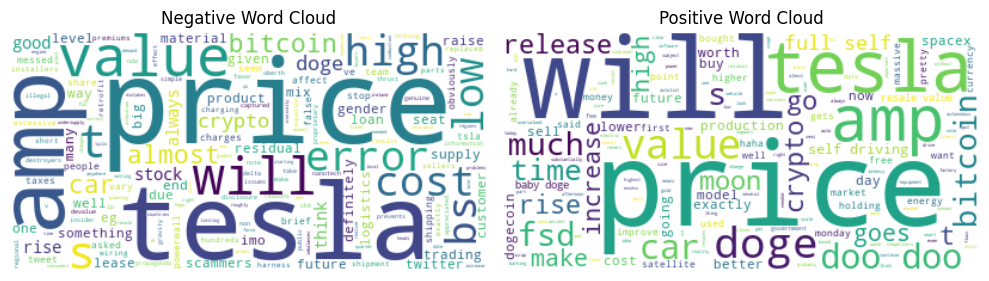

In [872]:
#WordCloud
data = pd.read_csv('./results-BERT/label_bert_svalabs_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()


# BERT - Modelo de Zainlaq7

In [873]:
#Read the data
df_zainlaq7 = pd.read_csv("./results-BERT/label_bert_zainalq7_tweets.csv")
df_zainlaq7['date'] = pd.to_datetime(df_zainlaq7['date']).dt.date

In [874]:
#Check the data
df_zainlaq7

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...  NEGATIVE
1    2013-05-25  am not suggesting shutting down co2 production...  NEGATIVE
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin  POSITIVE
263  2022-01-08  monthly subscription price will rise when fsd ...  POSITIVE
264  2022-01-08  fsd price will rise as we get closer to fsd pr...  POSITIVE
265  2022-01-08           tesla fsd price rising to  12k on jan 17  POSITIVE

[266 rows x 3 columns]

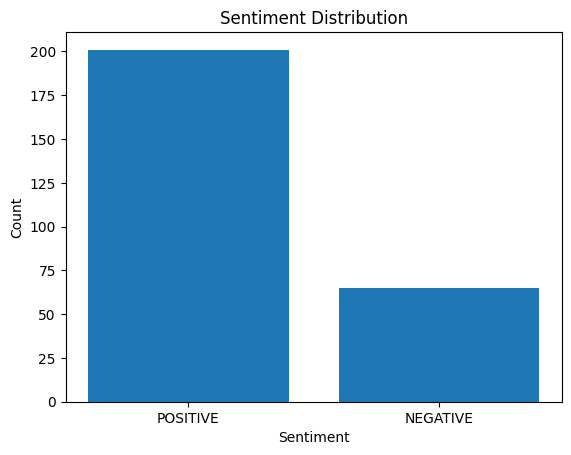

In [875]:
#Plot the distributuion of sentiments (bar)
sentiment_counts = df_zainlaq7['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

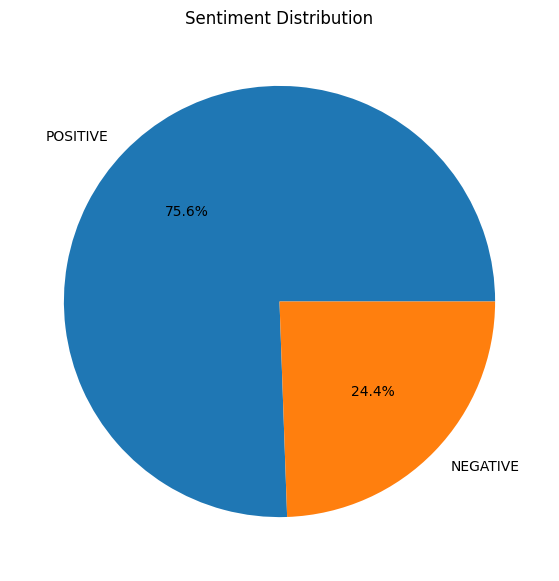

In [876]:
#Plot the distribution of sentiments (pie)
sentiment_counts = df_zainlaq7['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

C:\Users\drago\AppData\Local\Temp\ipykernel_11832\2957337207.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


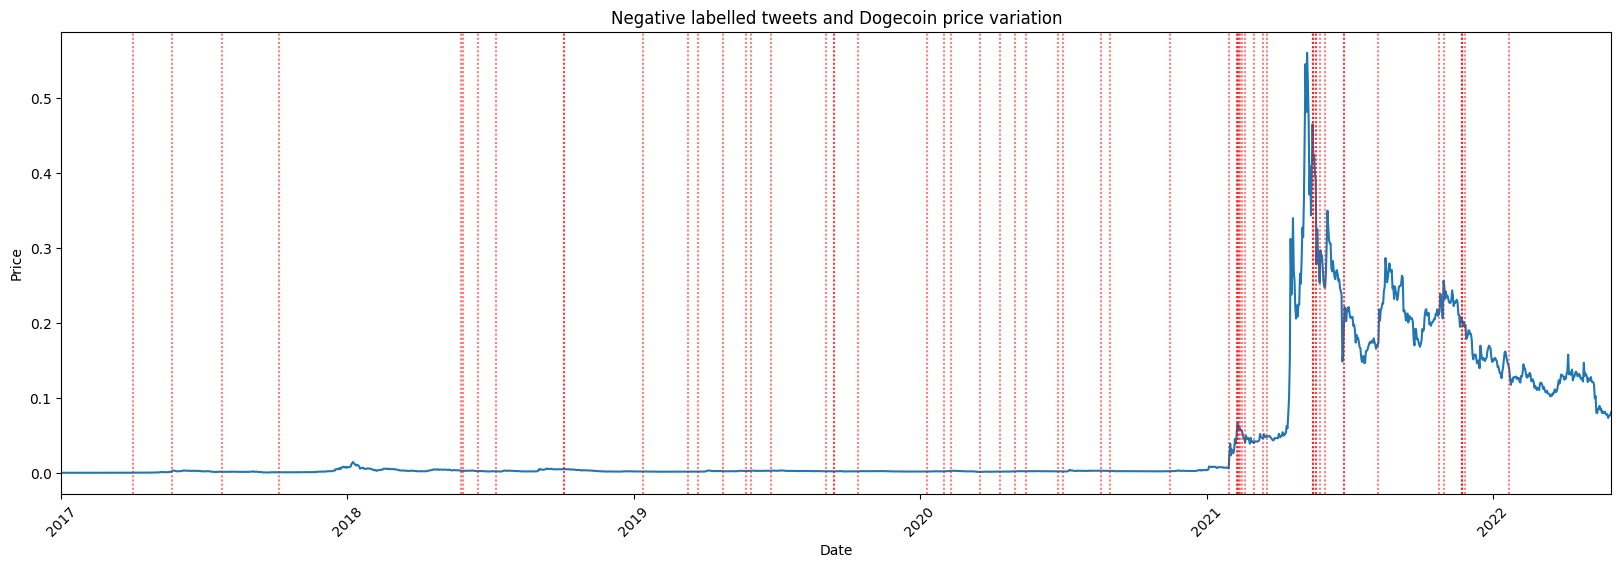

In [877]:
#Plot the distribution of negative tweets
a = df_zainlaq7[df_zainlaq7['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")
end_date = pd.to_datetime("2022-06-01")
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


C:\Users\drago\AppData\Local\Temp\ipykernel_11832\149970044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


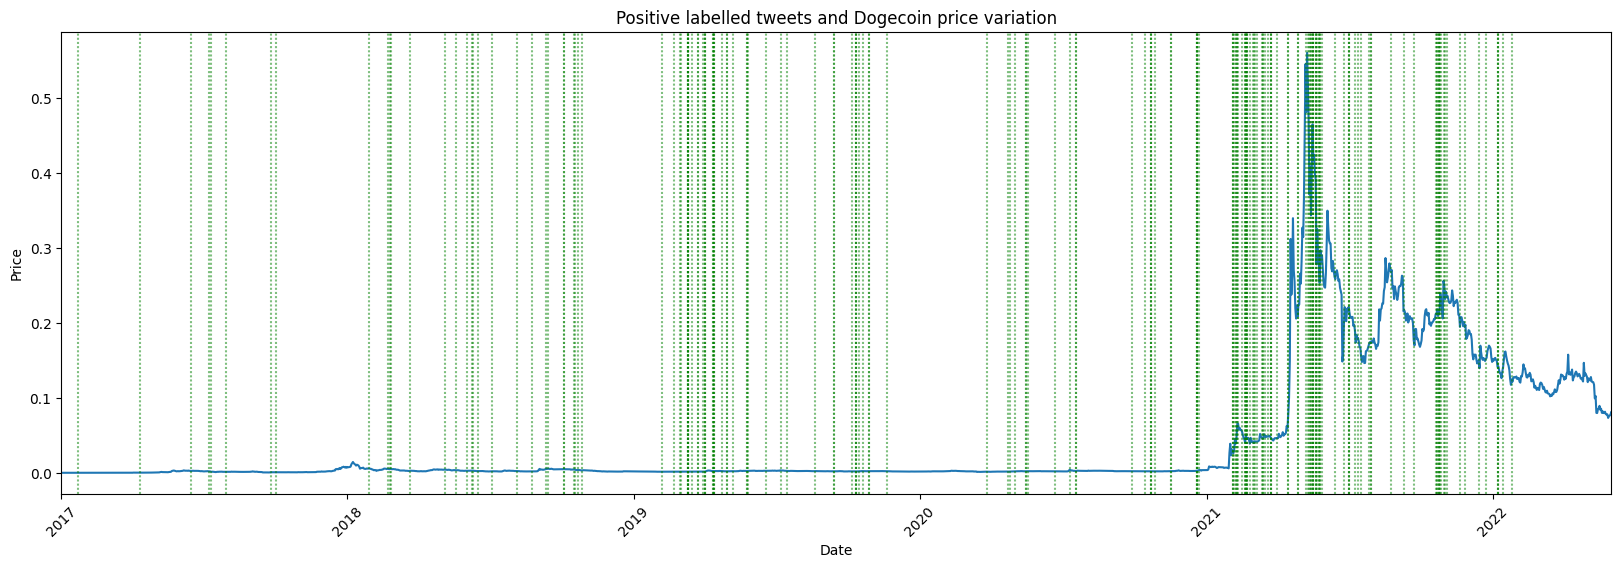

In [878]:
#Plot the distribution of positive tweets
a = df_zainlaq7[df_zainlaq7['Sentiment'] == 'POSITIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  
end_date = pd.to_datetime("2022-06-01")
plt.xlim(start_date, end_date)

# Display the graph
plt.show()


In [879]:
#Mapping the sentiment
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1}
df_zainlaq7['sentiment_encoded'] = df_zainlaq7['Sentiment'].map(sentiment_mapping)

In [880]:
#Grouping the data
grouped_data = df_zainlaq7.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data

date  sentiment_sum
0    2013-02-27              1
1    2013-05-03              4
2    2013-05-25             -1
3    2013-06-28             -1
4    2014-01-23              1
..          ...            ...
186  2021-12-23              1
187  2022-01-08              3
188  2022-01-14              1
189  2022-01-21             -1
190  2022-01-25              1

[191 rows x 2 columns]

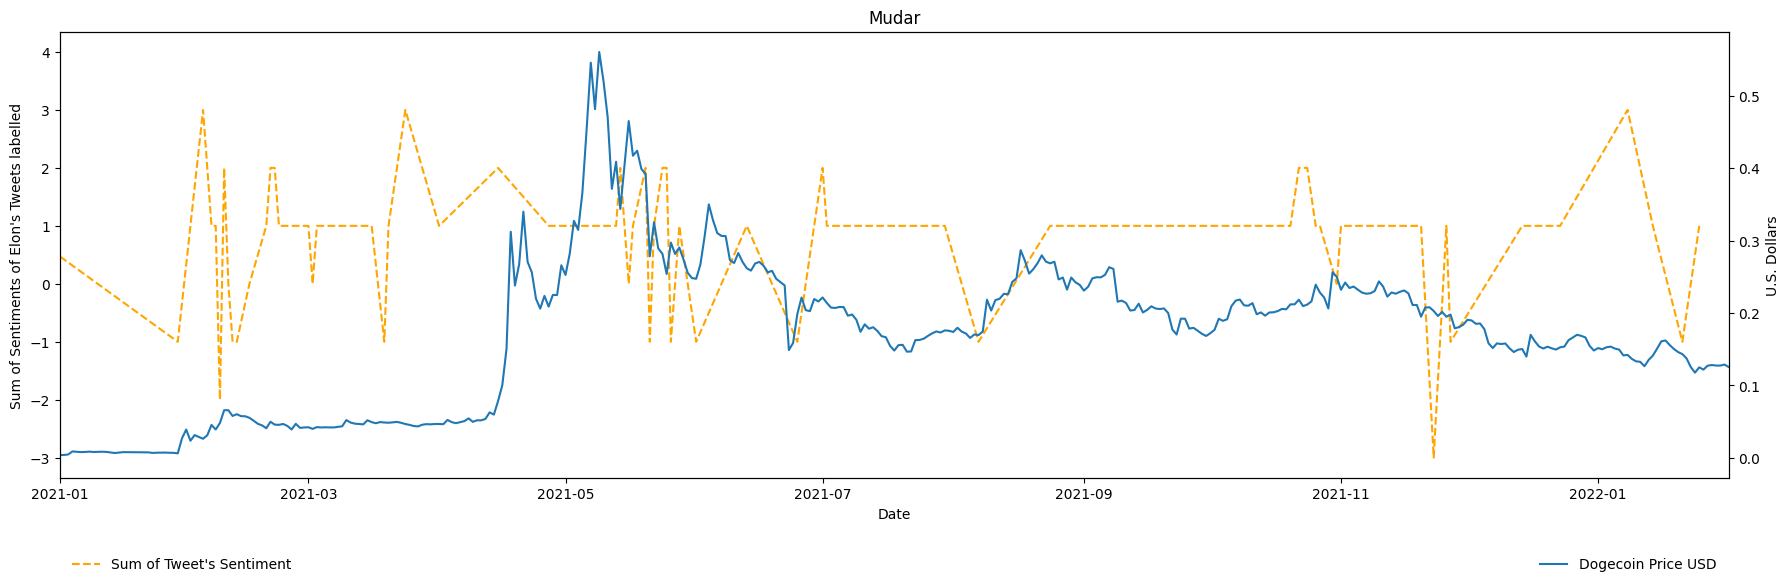

In [881]:
#Plot the distribution of sentiments line graph
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")
end_date = pd.to_datetime("2022-02-01")  
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()


## WordCloud

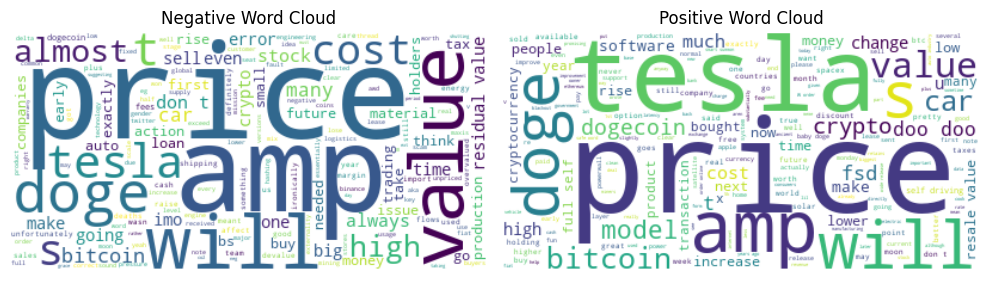

In [882]:
data = pd.read_csv('./results-BERT/label_bert_zainalq7_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# NLTK

In [883]:
#Read the data
df_nltk = pd.read_csv("./results-vader/label_vader_tweets.csv")
df_nltk['date'] = pd.to_datetime(df_nltk['date']).dt.date

In [884]:
#Check data
df_nltk

date                                        clean_tweet Sentiment
0    2013-06-28  taking action  will be a 7 day grace period fo...   NEUTRAL
1    2013-05-25  am not suggesting shutting down co2 production...  POSITIVE
2    2013-05-03  guaranteeing the world s best resale value in ...  POSITIVE
3    2013-05-03  yes  this does put an indirect floor on resale...  POSITIVE
4    2013-05-03  tesla raises model s resale value guarantee to...  POSITIVE
..          ...                                                ...       ...
261  2022-01-21  twitter is spending engineering resources on t...  NEGATIVE
262  2022-01-14                  tesla merch buyable with dogecoin   NEUTRAL
263  2022-01-08  monthly subscription price will rise when fsd ...   NEUTRAL
264  2022-01-08  fsd price will rise as we get closer to fsd pr...   NEUTRAL
265  2022-01-08           tesla fsd price rising to  12k on jan 17   NEUTRAL

[266 rows x 3 columns]

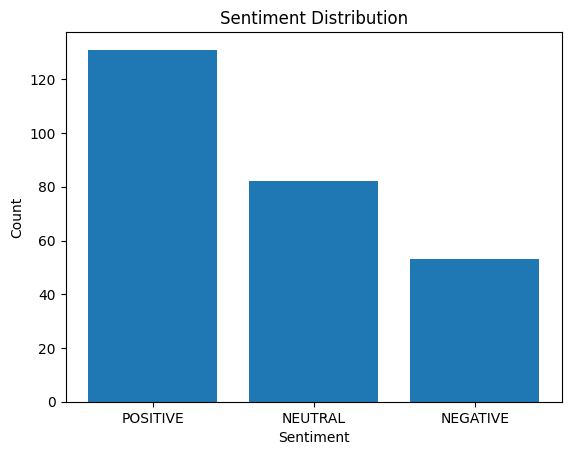

In [885]:
#Plot the distribution of sentiments bar graph
sentiment_counts = df_nltk['Sentiment'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.title('Sentiment Distribution')
plt.show()

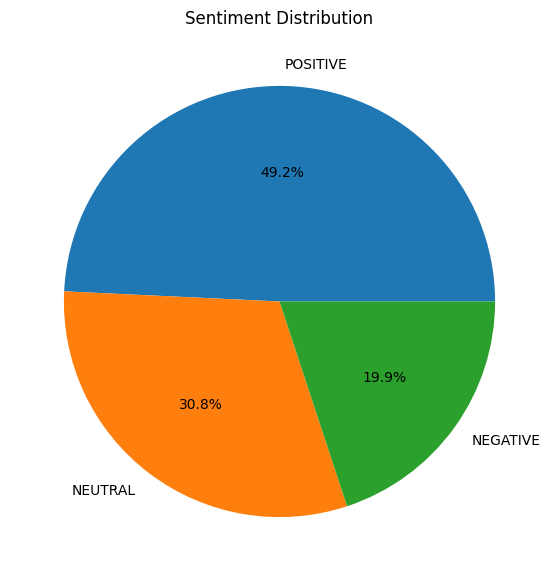

In [886]:
#Plot the distribution of sentiments pie chart
sentiment_counts = df_nltk['Sentiment'].value_counts()

fig = plt.figure(figsize=(10, 7))
plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
plt.title('Sentiment Distribution')
plt.show()

C:\Users\drago\AppData\Local\Temp\ipykernel_11832\968227953.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a.sort_values('date', inplace=True)


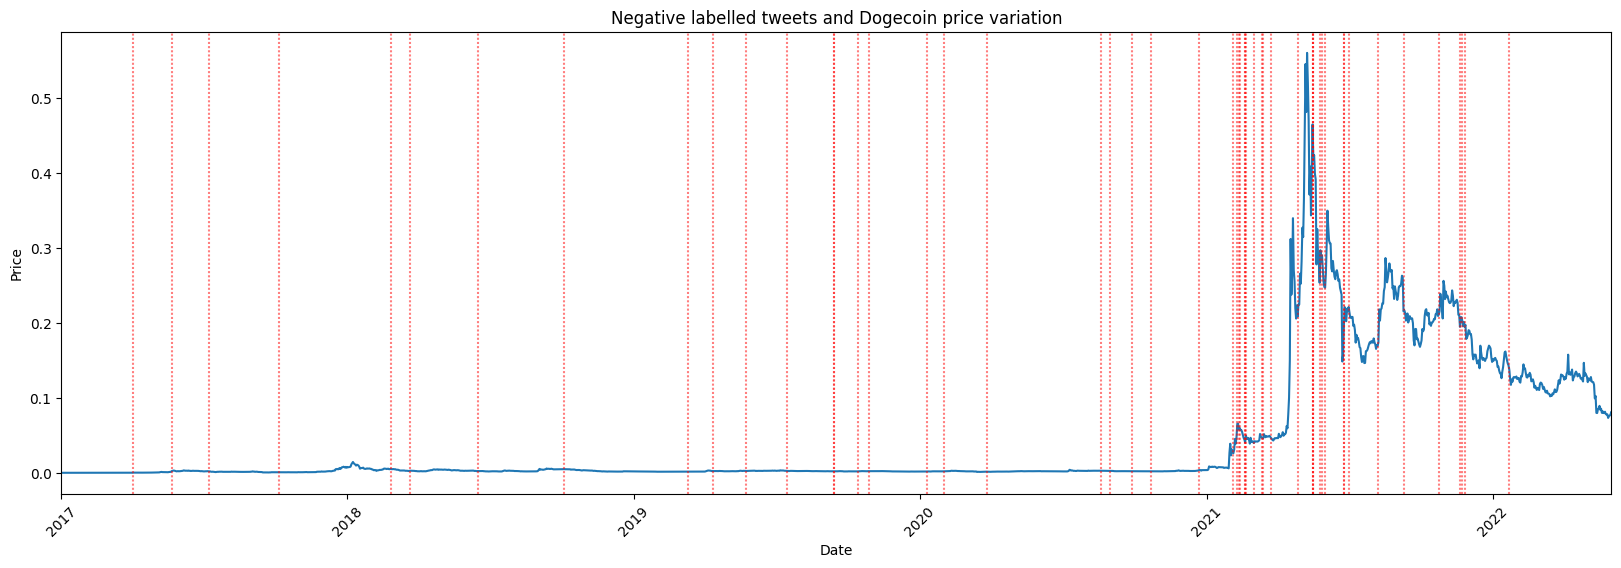

In [887]:
#Plot the distribution of negative tweets
a = df_nltk[df_nltk['Sentiment'] == 'NEGATIVE']
a.sort_values('date', inplace=True)

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Negative labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

legend_labels = []
# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='red', linestyle=(0, (1, 1)), alpha=0.5)


# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01") 
end_date = pd.to_datetime("2022-06-01")  
plt.xlim(start_date, end_date)

# Display the graph
plt.show()

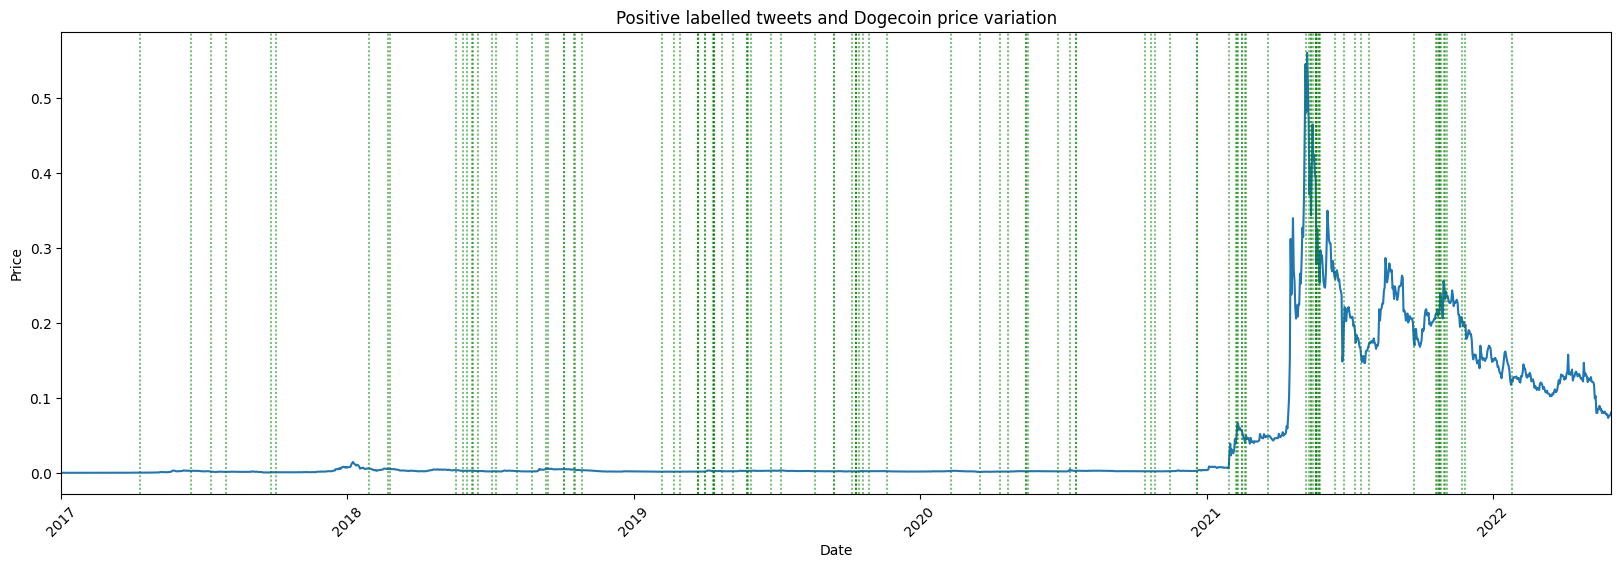

In [888]:
#Plot the distribution of positive tweets
a = df_nltk[df_nltk['Sentiment'] == 'POSITIVE']

# Create a line graph
plt.figure(figsize=(20, 6))
plt.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'])

# Customize the plot
plt.title('Positive labelled tweets and Dogecoin price variation')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)

# Add vertical lines for each negative tweet
for date in a['date']:
    plt.axvline(date, color='green', linestyle=(0, (1, 1)), alpha=0.5)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2017-01-01")  
end_date = pd.to_datetime("2022-06-01")  
plt.xlim(start_date, end_date)

# Display the graph
plt.show()

In [889]:
#Mapping the sentiment to a numerical value
sentiment_mapping = {'POSITIVE': 1, 'NEGATIVE': -1, 'NEUTRAL': 0}
df_nltk['sentiment_encoded'] = df_nltk['Sentiment'].map(sentiment_mapping)

In [890]:
#Grouping the data by date and summing the sentiment values
grouped_data = df_nltk.groupby(['date']).agg({'sentiment_encoded': 'sum'}).reset_index()

# Rename the 'sentiment_encoded' column to 'sentiment_sum'
grouped_data = grouped_data.rename(columns={'sentiment_encoded': 'sentiment_sum'})
grouped_data


date  sentiment_sum
0    2013-02-27              1
1    2013-05-03              4
2    2013-05-25              1
3    2013-06-28              0
4    2014-01-23              0
..          ...            ...
186  2021-12-23              0
187  2022-01-08              0
188  2022-01-14              0
189  2022-01-21             -1
190  2022-01-25              1

[191 rows x 2 columns]

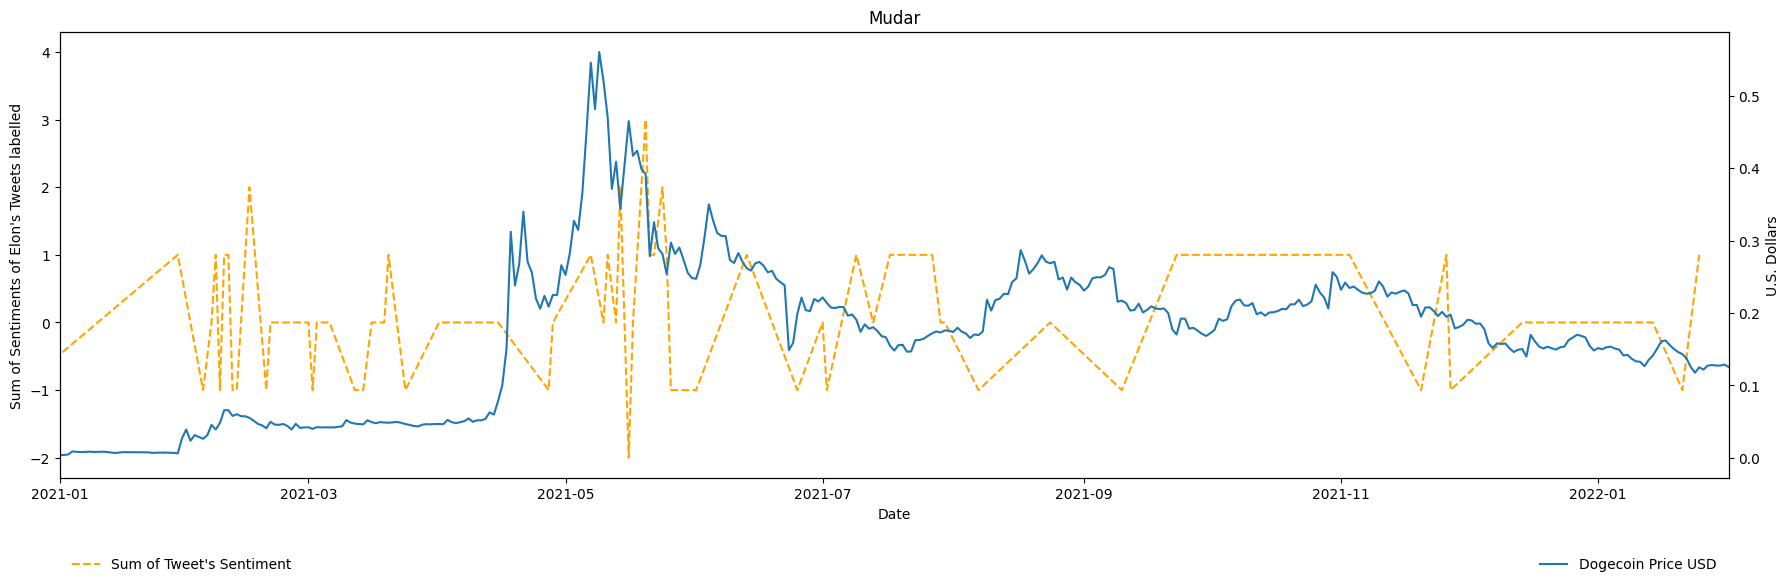

In [891]:
# Plot the line graph
fig, ax1 = plt.subplots(figsize=(18, 6))

# Plot the scatter points
ax1.scatter(grouped_data['date'], grouped_data['sentiment_sum'], color='orange',s=0 , marker='s')

# Connect the dots with a line
ax1.plot(grouped_data['date'], grouped_data['sentiment_sum'], label='Sum of Tweet\'s Sentiment', linestyle='--', color='orange')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sum of Sentiments of Elon\'s Tweets labelled')
ax1.set_title('Mudar')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the line graph on the second y-axis
ax2.plot(df_dogecoin['date'], df_dogecoin['dogecoin_price'], linestyle='-', label='Dogecoin Price USD')
ax2.set_ylabel('U.S. Dollars')

# Show legend for both axes
ax1.legend(loc='upper left', bbox_to_anchor=(0, -0.15), frameon=False)
ax2.legend(loc='upper right', bbox_to_anchor=(1, -0.15), frameon=False)

# Set the x-axis limits to the desired date range
start_date = pd.to_datetime("2021-01-01")  
end_date = pd.to_datetime("2022-02-01")
ax1.set_xlim(start_date, end_date)


plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

## WordCloud

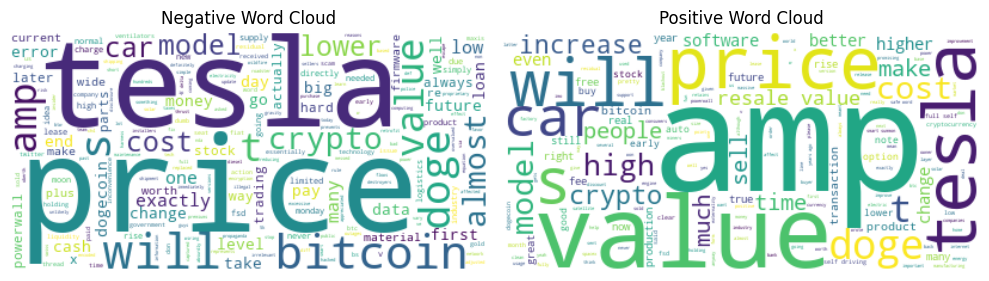

In [892]:
data = pd.read_csv('./results-vader/label_vader_tweets.csv')

# Retrieve negative and positive tweets from the 'data' DataFrame
negative_tweets = data[data['Sentiment'] == 'NEGATIVE']['clean_tweet'].tolist()
positive_tweets = data[data['Sentiment'] == 'POSITIVE']['clean_tweet'].tolist()

# Join all negative tweets into a single string
negative_text = ' '.join(negative_tweets)

# Create a WordCloud object for negative tweets
negative_wordcloud = WordCloud(background_color='white').generate(negative_text)

# Join all positive tweets into a single string
positive_text = ' '.join(positive_tweets)

# Create a WordCloud object for positive tweets
positive_wordcloud = WordCloud(background_color='white').generate(positive_text)

# Display the generated word clouds using matplotlib
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(negative_wordcloud, interpolation='bilinear')
axes[0].set_title('Negative Word Cloud')
axes[0].axis('off')

axes[1].imshow(positive_wordcloud, interpolation='bilinear')
axes[1].set_title('Positive Word Cloud')
axes[1].axis('off')

plt.tight_layout()
plt.show()